<a href="https://colab.research.google.com/github/ramansandhu17/Airbnb_Analysis/blob/main/booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
file_df=pd.read_csv("NRSairbnb_bookings.csv")

#file_df.info()

#change date to datetype

file_df["Date"] = pd.to_datetime(file_df["Date"])

file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           905 non-null    datetime64[ns]
 1   Occupancy      905 non-null    int64         
 2   PricePerNight  905 non-null    int64         
 3   Revenue        905 non-null    int64         
 4   PropertyID     905 non-null    object        
 5   GuestID        905 non-null    object        
 6   ReviewSummary  823 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 49.6+ KB


In [2]:
#extract month and year from date

file_df["Month"]=file_df["Date"].dt.month
file_df["Year"]=file_df["Date"].dt.year

file_df.head()

,Date,Occupancy,PricePerNight,Revenue,PropertyID,GuestID,ReviewSummary,Month,Year
0,2024-08-05,1,169,169,P001,G1001,"A perfect stay, felt like home!",8,2024
1,2024-08-06,1,123,123,P001,G1001,"Loved the location, very convenient!",8,2024
2,2024-08-07,1,85,85,P001,G1001,"A perfect stay, felt like home!",8,2024
3,2024-08-08,1,134,134,P001,G1001,"Super cozy, highly recommend!",8,2024
4,2024-08-09,0,196,0,P001,G0,NaN,8,2024


In [3]:
#Calculate total booking per month; this is aggregated data
monthly_trend=file_df.groupby(["Year","Month"])["Occupancy"].sum().reset_index()

#renaming column for new dataframe

monthly_trend.rename(columns={"Occupancy":"TotalBookings"},inplace=True)

monthly_trend.head()

,Year,Month,TotalBookings
0,2024,8,131
1,2024,9,136
2,2024,10,141
3,2024,11,132
4,2024,12,140


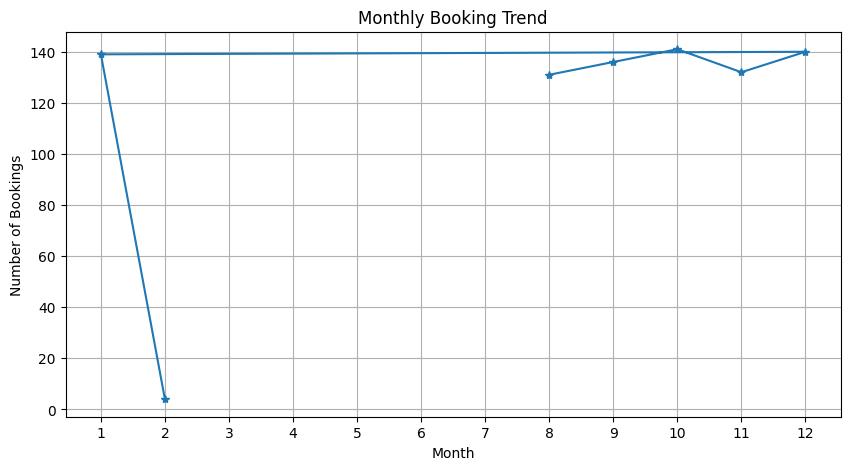

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_trend = monthly_trend.sort_values(by=["Year", "Month"])


plt.plot(monthly_trend['Month'],monthly_trend['TotalBookings'],marker='*')

#Add the x and y line names
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Monthly Booking Trend")

plt.grid(True)
plt.xticks(range(1,13))

plt.show()

  PropertyID  Year  Month  TotalBookings
0       P001  2024      8             26
1       P001  2024      9             27
2       P001  2024     10             28
3       P001  2024     11             27
4       P001  2024     12             30


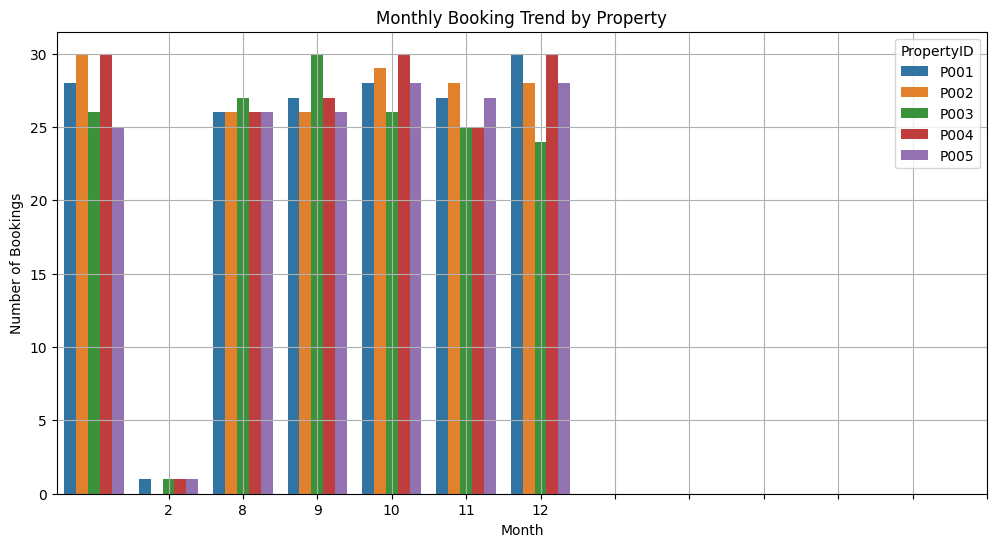

In [13]:
property_trend=file_df.groupby(["PropertyID","Year","Month"])["Occupancy"].sum().reset_index()

property_trend.rename(columns={"Occupancy":"TotalBookings"},inplace=True)
print(property_trend.head())

import matplotlib.pyplot as plt
import seaborn as sns #importing this library because of the ease of usage with multiproeprty visualizations

plt.figure(figsize=(12,6))


#sns.lineplot(data=property_trend,x="Month",y="TotalBookings",hue="PropertyID",marker="*")
#change lineplot to barplot

sns.barplot(data=property_trend,x="Month",y="TotalBookings",hue="PropertyID")

#Add the x and y line names
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Monthly Booking Trend by Property")

plt.grid(True)
plt.xticks(range(1,13))


plt.show()


# New Section